# 🛒 Project Title: Supermarket Sales ETL with PostgreSQL


**Author:** Juan Martín Flores Espinoza  

**Date:** 2025-06-04  

**Description:**  

This notebook walks through the process of loading, transforming, and storing the *Supermarket Sales* dataset into a PostgreSQL database using Python. The goal is to build an end-to-end ETL (Extract, Transform, Load) process using industry-standard tools and practices.  

The project is part of a broader portfolio focused on data engineering and analytics, demonstrating SQL integration, database creation, and Python workflows for real-world data handling.

**Tools Used:**  
- Python (`pandas`, `sqlalchemy`, `dotenv`, `psycopg2`)  
- PostgreSQL  
- Jupyter Notebook / Visual Studio Code / pgAdmin 4  

---

## 📂 Dataset Info

- **Name:** supermarket_sales.csv  
- **Location:** `../data/supermarket_sales.csv`  
- **Source:** [Kaggle - Supermarket Sales Dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)  
- **Observations:** 1000 rows  
- **Fields:** 17 columns including invoice ID, branch, product line, gender, quantity, total, date, time, and rating.

---

## 🎯 Objectives

- 📌 Load a real-world dataset and understand its structure.
- 🧹 Perform minimal data cleaning if needed.
- 🛠️ Set up a PostgreSQL database using `psycopg2` or `sqlalchemy`.
- 🗄️ Create the table schema explicitly using SQL commands.
- 🔄 Insert data into the database using `pandas.to_sql()` or SQL `INSERT` statements.
- 🔍 Validate the data insertion with basic SQL queries.
- 🗂️ Prepare a clean and reproducible notebook following best practices.

---

## 📊 Process Flow

1. **Import Required Libraries**
2. **Load and Preview Dataset**
3. **Connect to PostgreSQL Database**
4. **Create & Load Data into PostgreSQL**
5. **Run Queries to Validate Insertion**
6. **Wrap Up with Insights and Observations**

---

## 🔚 Expected Output

- Database named `marketsales` with one table: `supermarket_sales`
- Full table loaded with 1000 records
- Clean, reproducible and documented Jupyter notebook
- Push to GitHub as part of your public portfolio

**1) Import Requiered Libraries**

In [33]:
import pandas as pd
import sys
import os
import importlib  # Required to reload modules

In [34]:
# --- YOUR MODULE IMPORT SECTION ---
# path to the module
file_path = "/Users/jmfe2/VSC/data-portfolio/scripts/02_supermarket/cleaning.py"
path_to_module_folder = os.path.dirname(file_path)

if path_to_module_folder not in sys.path:
    sys.path.append(path_to_module_folder)
    print(f"Added '{path_to_module_folder}' to sys.path")

# Now you can import the module
import cleaning

# FORCE module reload to ensure the latest saved version is used
# This is CRITICAL if you have edited the cleaning.py file and the kernel has not reloaded it
importlib.reload(cleaning)

<module 'cleaning' from '/Users/jmfe2/VSC/data-portfolio/scripts/02_supermarket/cleaning.py'>

 **2) Load and Preview Dataset**

In [35]:
df = pd.read_csv(
    "/Users/jmfe2/VSC/data-portfolio/data/02_supermarket_sales/supermarket_sales.csv"
)  # Read the CSV file into a DataFrame

In [36]:
# use pd.set_option to set the display format for floating point numbers
pd.set_option("display.float_format", "{:.2f}".format)

In [37]:
df.head()  # Display the first few rows of the DataFrame

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [38]:
# Basi data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [39]:
df.describe()  # Get a statistical summary of the DataFrame

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.91,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [40]:
df.isnull().sum()  # Check for missing values in each column

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [41]:
df = cleaning.clean_column_names(
    df
)  # Clean the column names using the function from the cleaning module
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.02,42.37,1/29/2019,13:46,Ewallet,40.35,4.76,2.02,6.20
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,17:16,Ewallet,973.80,4.76,48.69,4.40
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,2/9/2019,13:22,Cash,31.84,4.76,1.59,7.70
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2/22/2019,15:33,Cash,65.82,4.76,3.29,4.10


**3) Connect to PostgreSQL Database**

In [42]:
# Once th database is created in PostgreSQL, you can use the following code to connect to it and create a table:

from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv()  # securely load environment variables from a .env file

DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

**4) Create & Load Data into PostgreSQL**

In [43]:
df.to_sql("supermarket_sales", engine, index=False, if_exists="replace")
# This will create a table named 'supermarket_sales' in the PostgreSQL database adding the data in the dataframe and replace it if it already exists.

1000

**5) Run Queries to Validate Insertion**

In [44]:
from sqlalchemy import text

query = """
SELECT COUNT(*) FROM supermarket_sales;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))

    for row in result:
        print("Total records:", row[0])

Total records: 1000


In [45]:
from sqlalchemy import text

query = """
SELECT gender, COUNT(*) FROM supermarket_sales GROUP BY gender;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))

    for row in result:
        print(row)

('Female', 501)
('Male', 499)


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SQL query to get the total sales by city
query = """
SELECT city, COUNT(*) as total_invoices
FROM supermarket_sales
GROUP BY city
ORDER BY total_invoices DESC;
"""

# execute the query and load the results into a DataFrame
df_city_sales = pd.read_sql(query, engine)

/var/folders/lb/_k3rsxpj7tg9p55cy4n7cw3h0000gn/T/ipykernel_8934/863585323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_invoices", y="city", data=df_city_sales, palette="viridis")


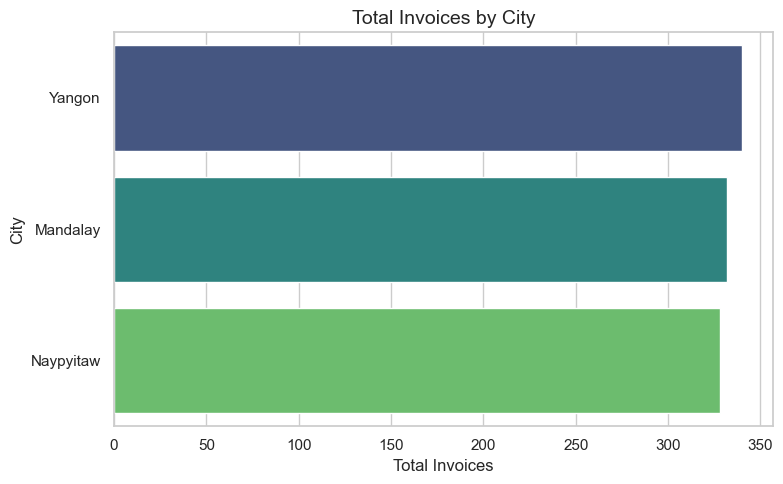

In [61]:
# plot style
sns.set_theme(style="whitegrid")  # Set the theme for seaborn

# create a bar plot for total sales by city
plt.figure(figsize=(8, 5))
sns.barplot(x="total_invoices", y="city", data=df_city_sales, palette="viridis")

# title and labels
plt.title("Total Invoices by City", fontsize=14)
plt.xlabel("Total Invoices", fontsize=12)
plt.ylabel("City")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_invoices_by_city.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

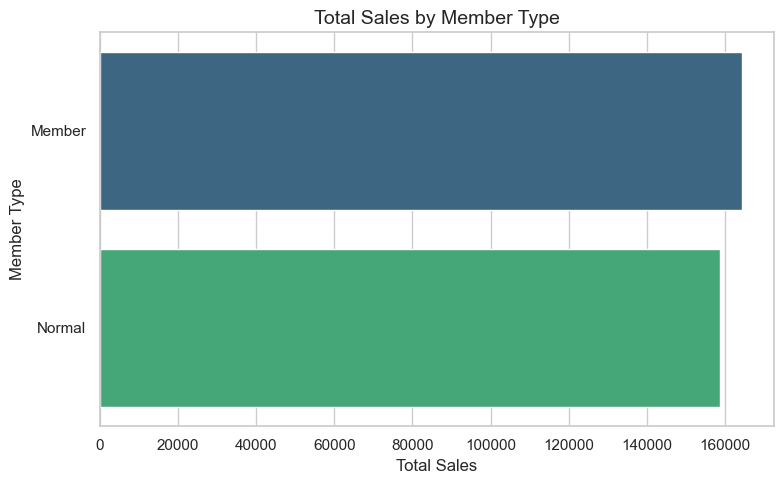

In [68]:
# SQL query to get the total sales by city
query = """
SELECT customer_type, SUM(total) as total_sales
FROM supermarket_sales
GROUP BY customer_type
ORDER BY total_sales DESC;
"""

# execute the query and load the results into a DataFrame
df_city_sales = pd.read_sql(query, engine)

# plot style
sns.set_theme(style="whitegrid")  # Set the theme for seaborn

# create a bar plot for total sales by city
plt.figure(figsize=(8, 5))
sns.barplot(
    x="total_sales",
    y="customer_type",
    data=df_city_sales,
    palette="viridis",
    hue="customer_type",
    legend=False,
)

# title and labels
plt.title("Total Sales by Member Type", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Member Type")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_customertype.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

/var/folders/lb/_k3rsxpj7tg9p55cy4n7cw3h0000gn/T/ipykernel_8934/687699330.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sales", y="gender", data=df_city_sales, palette="viridis")


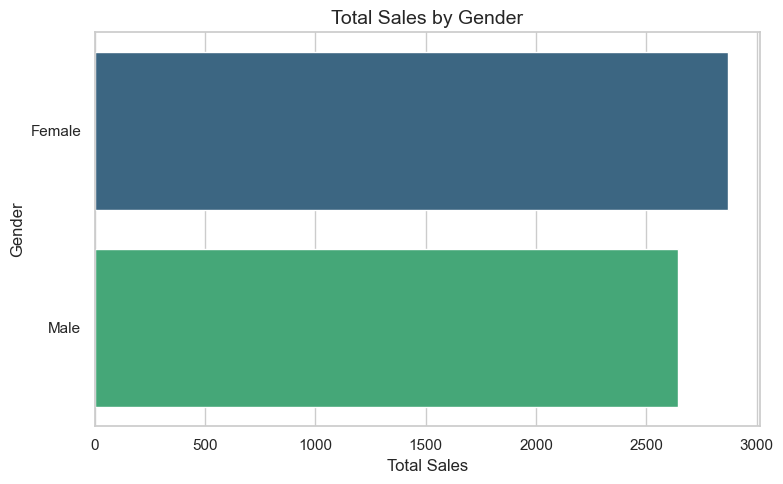

In [ ]:
# SQL query to get the total sales by city
query = """
SELECT gender, SUM(quantity) as total_sales
FROM supermarket_sales
GROUP BY gender
ORDER BY total_sales DESC;
"""

# execute the query and load the results into a DataFrame
df_city_sales = pd.read_sql(query, engine)

# plot style
sns.set_theme(style="whitegrid")  # Set the theme for seaborn

# create a bar plot for total sales by city
plt.figure(figsize=(8, 5))
sns.barplot(
    x="total_sales",
    y="gender",
    data=df_city_sales,
    palette="viridis",
    hue="gender",
    legend=False,
)

# title and labels
plt.title("Total Sales by Gender", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Gender")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_gender.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

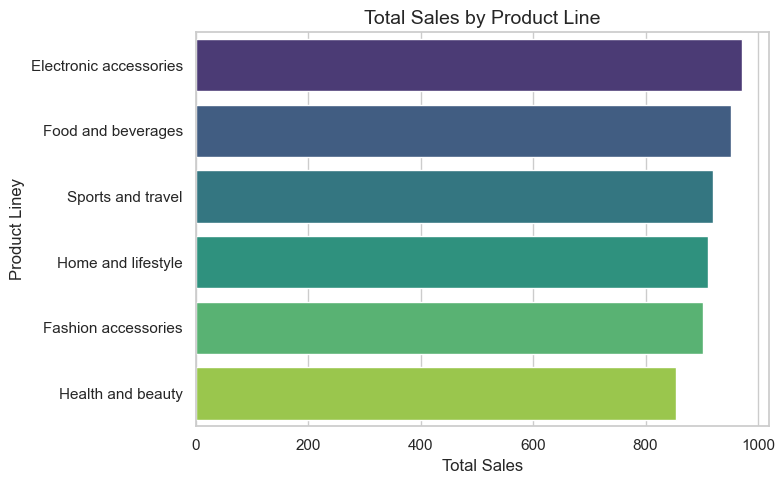

In [69]:
# SQL query to get the total sales by city
query = """
SELECT product_line, SUM(quantity) as total_sales
FROM supermarket_sales
GROUP BY product_line
ORDER BY total_sales DESC;
"""

# execute the query and load the results into a DataFrame
df_city_sales = pd.read_sql(query, engine)

# plot style
sns.set_theme(style="whitegrid")  # Set the theme for seaborn

# create a bar plot for total sales by city
plt.figure(figsize=(8, 5))
sns.barplot(
    x="total_sales",
    y="product_line",
    data=df_city_sales,
    palette="viridis",
    hue="product_line",
    legend=False,
)

# title and labels
plt.title("Total Sales by Product Line", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product Liney")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_productline.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

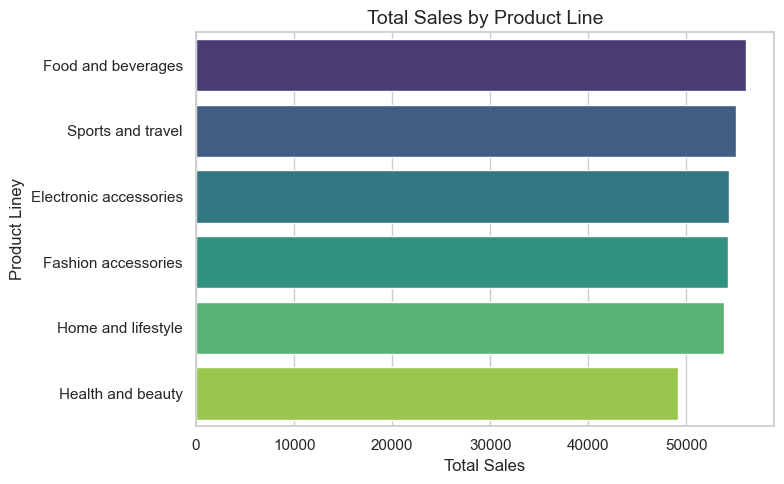

In [70]:
# SQL query to get the total sales by city
query = """
SELECT product_line, SUM(total) as total_sales
FROM supermarket_sales
GROUP BY product_line
ORDER BY total_sales DESC;
"""

# execute the query and load the results into a DataFrame
df_city_sales = pd.read_sql(query, engine)

# plot style
sns.set_theme(style="whitegrid")  # Set the theme for seaborn

# create a bar plot for total sales by city
plt.figure(figsize=(8, 5))
sns.barplot(
    x="total_sales",
    y="product_line",
    data=df_city_sales,
    palette="viridis",
    hue="product_line",
    legend=False,
)

# title and labels
plt.title("Total Sales by Product Line", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product Liney")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_productline.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

### 📌 Technical Conclusions

- ✅ This notebook demonstrated the full workflow to load data from a CSV file into a PostgreSQL database using `SQLAlchemy` and `pandas.to_sql()`.
- 🔐 Database connection was managed securely using environment variables with `dotenv`.
- 🧱 The database structure was defined manually via pgAdmin, which aligns with best practices for production-level database schema control.
- 🛠️ Data insertion was verified using SQL queries executed from Python through the `engine.connect()` method.

---

### 📊 Potential Next Steps

- Perform SQL queries directly from Python to practice `SELECT`, `GROUP BY`, `JOIN`, etc.
- Build dashboards using Power BI or Tableau by connecting to this PostgreSQL database.
- Apply more advanced ETL (Extract, Transform, Load) procedures in future versions.

---

### 💡 Final Thought

This project represents the first step toward integrating Python data analysis with relational databases. Mastering this workflow is essential for advancing into Data Analyst or Data Engineer roles.

